# Strucanti

Before doing anything, we want to create a variable indicating the initial working directory of the jupyter notebook file.

In [1]:
WORKDIR = !pwd
WORKDIR = WORKDIR[0]

%cd $WORKDIR

/home/nizarmah/Documents/Learning/Capstone/strucanti


## Importing Libraries

In [2]:
import sys
from os import path

import re

import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold

from sklearn.decomposition import PCA

In addition, we need to make some changes to the libraries, such as increasing *dpi* for `matplotlib`.

In [3]:
mpl.rcParams['figure.dpi']= 300

Most of pandas functions require a `RandomState`. To keep it consistent for anyone who runs the jupyter notebook to get the same results, we will be setting a global `RANDOM_STATE` variable.

In [4]:
RANDOM_STATE = 42

## Reading Data

We have two different datasets, one `bib-40` and the other is `bib-95`.

Therefore, we're going to want to make it easy to deal with both.

In [5]:
list_dataset_filename = ['dataset_astral-scopedom-seqres-gd-sel-gs-bib-40-2.0.7.csv',
                            'dataset_astral-scopedom-seqres-gd-sel-gs-bib-95-2.0.7.csv']

dataset_filename = list_dataset_filename[0]

dataset = pd.read_csv(dataset_filename)
dataset.shape

(13965, 482)

Let us take a small look at our dataset.

In [6]:
dataset

,sid,class,folds,superfamilies,families,sequence,3_h,5_e,7_E,9_h,...,4645_H,4657_H,4677_h,4881_H,4899_H,4913_H,5257_h,5273_H,6417_H,6419_H
0,d1dlwa_,a,1,1,1,slfeqlggqaavqavtaqfyaniqadatvatffngidmpnqtnkta...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,d2gkma_,a,1,1,1,gllsrlrkrepisiydkiggheaievvvedffvrvladdqlsaffs...,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,d1ngka_,a,1,1,1,ksfydavggaktfdaivsrfyaqvaedevlrrvypeddlagaeerl...,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d2bkma_,a,1,1,1,eqwqtlyeaiggeetvaklveafyrrvaahpdlrpifpddltetah...,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d4i0va_,a,1,1,1,aslyeklggaaavdlavekfygkvladervnrffvntdmakqkqhq...,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13960,d3s2ra_,g,97,1,0,ginpeirknedkvvdsvvvtelsknitpycrcwrsgtfplcdgscv...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13961,d4c3hd_,g,98,1,1,sattlntpvvihatqlpqhvstdevlqflesfidekeniidsttmn...,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13962,d3jb9e_,g,99,1,1,rlrtsrtkrppdgfdeieptliefqdrmrqientmgkgtktemlap...,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13963,d5lj3n2,g,100,1,1,nepppniceqclgdeanirmtkipqgseckictlpftlyhfktskr...,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As you can see, we have a **sparse dataset**

If we further take a look at the dataset, we can see that the dataset is sorted by class, folds, superfamilies, then families. However, this can influence our model's accuracy and variance when predicting our data as the train and test splits will not contain a balanced distribution of the classes, folds, superfamilies and families.

Therefore, it is important that we shuffle our dataset before we start working with it.

> Please Note that we will be resetting the index after sampling

In [7]:
dataset = dataset.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

So, let's take another look now at our dataset.

In [8]:
dataset

,sid,class,folds,superfamilies,families,sequence,3_h,5_e,7_E,9_h,...,4645_H,4657_H,4677_h,4881_H,4899_H,4913_H,5257_h,5273_H,6417_H,6419_H
0,d1jixa_,c,87,1,1,mkiaiinmgnnvinfktvpssetiylfkvisemglnvdiislkngv...,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,d1s3ja_,a,4,5,28,sadqlmsdiqlslqalfqkiqpemlesmekqgvtpaqlfvlaslkk...,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,d1l7ca2,a,24,9,1,iddflavsenhiledvnkcvialqekdvdgldrtagairgraarvi...,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d3ir1a_,c,94,1,0,keivfgttvgdfgdmvkeqiqpelekkgytvklveftdyvrpnlal...,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d1xk5a_,d,142,2,5,hyanqlmlsewlidvpsdlgqewivvvcpvgkralivasrgstsay...,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13960,d1s71a2,b,122,1,1,farrdltaaeasaaangrslpavgidgvyaacdadgrviallrdeg...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13961,d2fd6u1,g,7,1,3,lrcmqcktngdcrveecalgqdlcrttivrlweegeelelveksct...,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13962,d3i65a_,c,1,4,1,synpefflydiflkfclkyidgeichdlflllgkynilpydtsnds...,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13963,d1zuja1,a,25,1,1,sidekyeaevkkseidhhkptagamlshvlsnifyekislmqagly...,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Checking for Missing Data

In [9]:
dataset_nullcheck = dataset.isnull().any()

null_columns = dataset_nullcheck[dataset_nullcheck == True]

print("Number of columns that contain null values :", len(null_columns))
print("Names of columns that contain null values :", null_columns)

Number of columns that contain null values : 0
Names of columns that contain null values : Series([], dtype: bool)


As you can see, there are no _column names_ that contain any missing data.

This shows that the columns we have don't have any missing data.

## Checking for Categorical Values

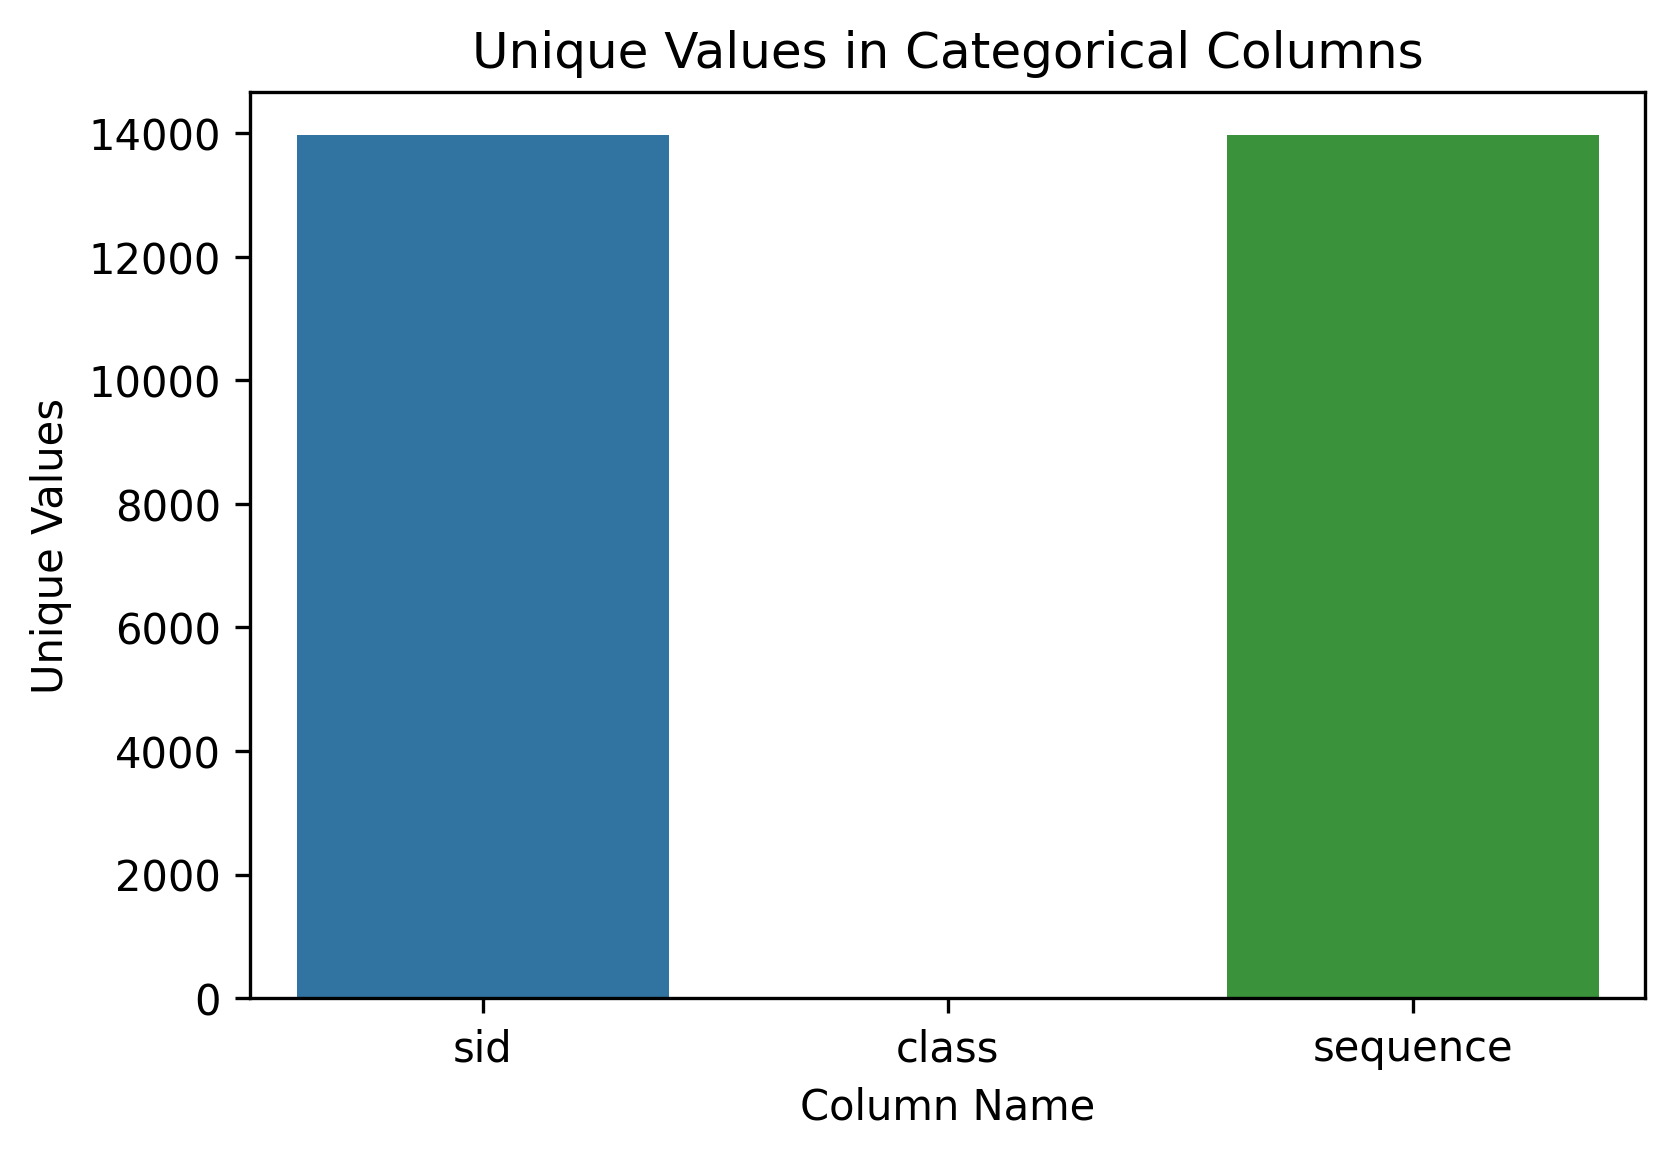

In [10]:
categorical_cols = [ col for col in dataset.columns if dataset[col].dtype == 'object' ]

sns.barplot(x=categorical_cols, y=dataset[categorical_cols].nunique())

plt.title('Unique Values in Categorical Columns')
plt.xlabel('Column Name')
plt.ylabel('Unique Values')
plt.show()

As you can tell, `sid` and `sequence` columns are as frequent as the entries that we have. In addition, they are the sequence id, and the sequence itself.

Therefore, we will disregard them.

So, we have only one categorical column, which is the target or the label `class`.

So, let us check what are the _unique_ values we have in `class`. 

In [11]:
dataset['class'].unique()

array(['c', 'a', 'd', 'b', 'g', 'f', 'e'], dtype=object)

Here are the percentage frequencies of each class.

In [12]:
def class_percentage_occurance():
    return (dataset['class'].value_counts() * 100 / dataset['class'].size).to_frame(name='Percentage Occurance').T

class_percentage_occurance()

,c,d,b,a,g,e,f
Percentage Occurance,28.471178,24.468314,20.107411,18.045113,5.069817,1.954887,1.88328


It is also important to see the frequency of each class.

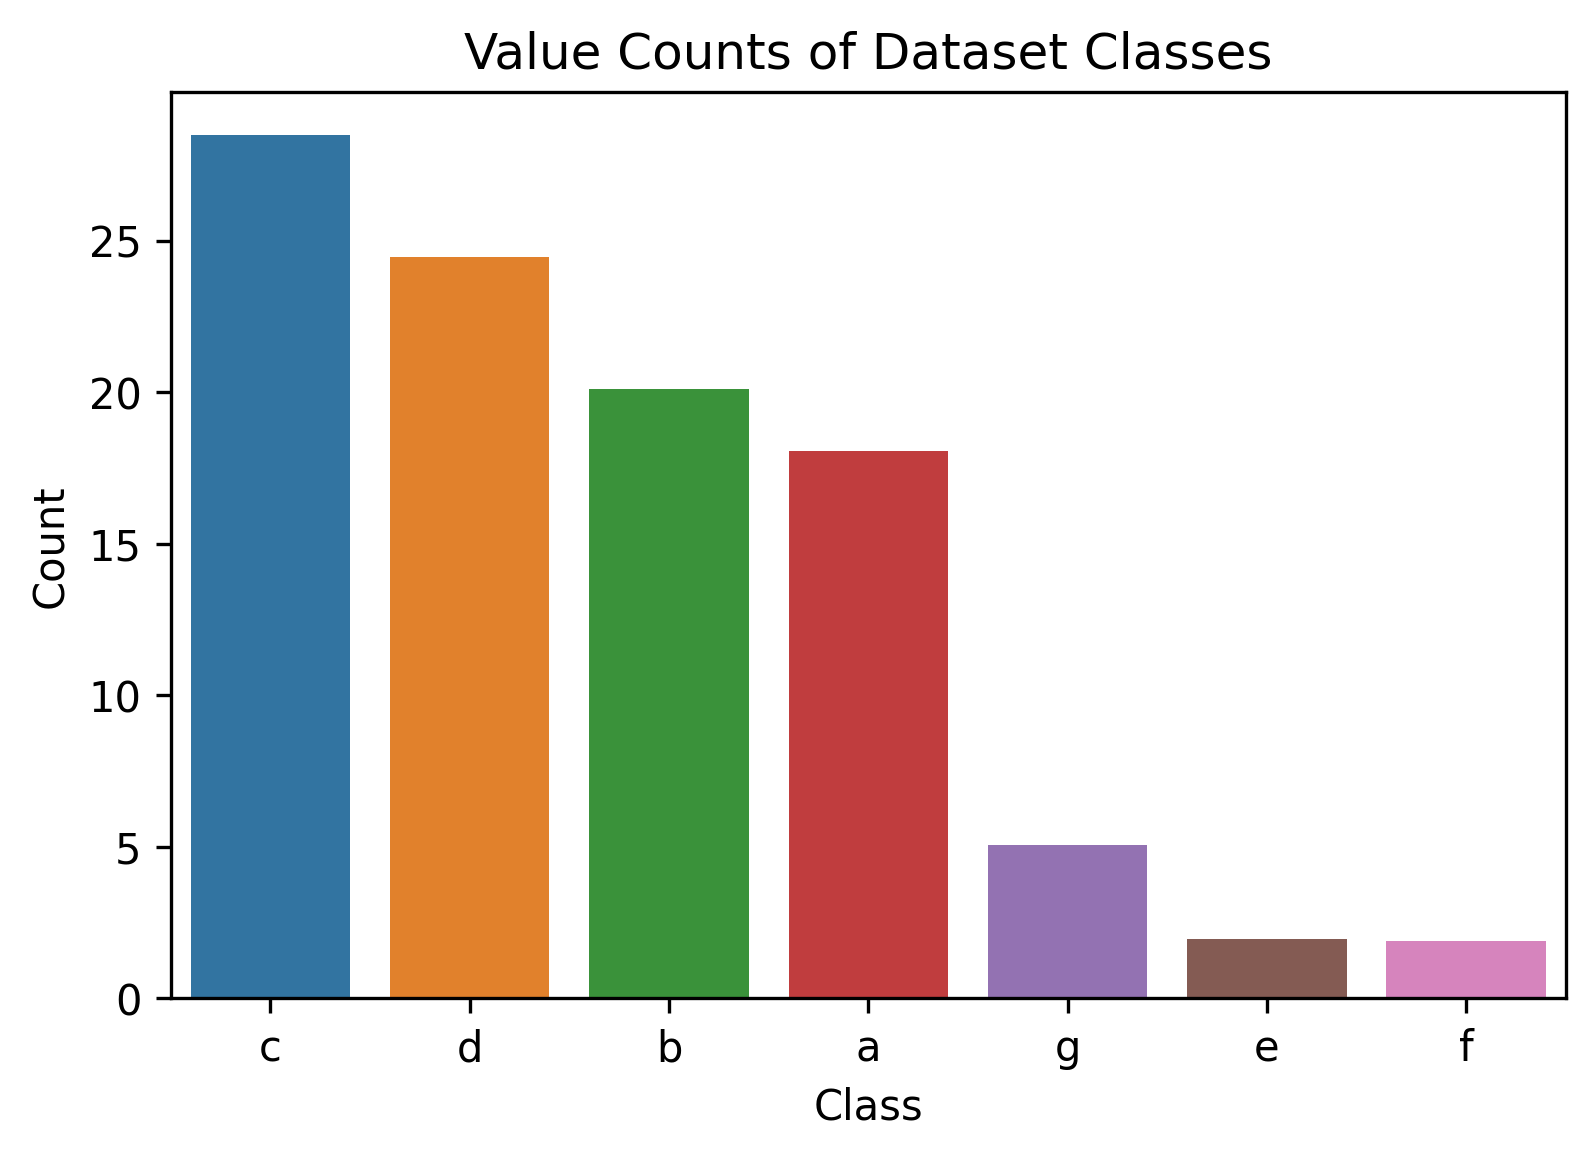

In [13]:
sns.barplot(data=class_percentage_occurance())

plt.title('Value Counts of Dataset Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()